# **Lab Assignment: Dataset Analysis and Classification**

This assignment involves analyzing the provided dataset (`Custom_CNN_Features.csv`) and generating a detailed report.

---

## **1. Exploratory Data Analysis (EDA)**

### **Tasks**
1. **Attribute Details**  
   - Identify the data types of all attributes.
2. **Missing Values**  
   - Detect missing values and apply suitable imputation techniques.
3. **Class Balance**  
   - Check the distribution of class labels to ensure balance.
4. **Attribute Correlation**  
   - Generate a correlation matrix and visualize it using a heatmap.
5. **Dimensionality Analysis**  
   - Determine the rank of the matrix to study dimensionality.
6. **Normalization**  
   - Examine data range and normalizeuctured. All visualizations and results must support your conclusions.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, classification_report
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import time


In [3]:
import pandas as pd
df=pd.read_csv("D:\\Sem 6\\NNDL\\Lab\\Lab1\\Custom_CNN_Features.csv")
df.head

<bound method NDFrame.head of               Filename  Class Label          f0   f1   f2   f3   f4   f5  \
0                1.png            2   50.557468  0.0  0.0  0.0  0.0  0.0   
1           10.jpg.png            2  125.256027  0.0  0.0  0.0  0.0  0.0   
2               10.png            2   50.160606  0.0  0.0  0.0  0.0  0.0   
3              100.png            2   63.720730  0.0  0.0  0.0  0.0  0.0   
4            10091.jpg            2   64.484604  0.0  0.0  0.0  0.0  0.0   
...                ...          ...         ...  ...  ...  ...  ...  ...   
3248  patch_84.jpg.png            2  283.005707  0.0  0.0  0.0  0.0  0.0   
3249  patch_85.jpg.png            2  609.193603  0.0  0.0  0.0  0.0  0.0   
3250  patch_86.jpg.png            2  781.789490  0.0  0.0  0.0  0.0  0.0   
3251  patch_87.jpg.png            2  688.966675  0.0  0.0  0.0  0.0  0.0   
3252   patch_9.jpg.png            2  180.310455  0.0  0.0  0.0  0.0  0.0   

              f6  f7  ...         f190  f191         f192

In [4]:
df.dtypes

Filename        object
Class Label      int64
f0             float64
f1             float64
f2             float64
                ...   
f195           float64
f196           float64
f197           float64
f198           float64
f199           float64
Length: 202, dtype: object

In [5]:
df.isnull()

,Filename,Class Label,f0,f1,f2,f3,f4,f5,f6,f7,...,f190,f191,f192,f193,f194,f195,f196,f197,f198,f199
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3248,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3249,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3250,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3251,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
df.isnull().sum()

Filename       0
Class Label    0
f0             0
f1             0
f2             0
              ..
f195           0
f196           0
f197           0
f198           0
f199           0
Length: 202, dtype: int64

In [7]:
df.value_counts()

Filename              Class Label  f0          f1   f2          f3          f4   f5          f6         f7  f8           f9   f10         f11         f12  f13         f14  f15         f16        f17        f18         f19        f20          f21         f22          f23          f24         f25         f26         f27         f28         f29         f30          f31         f32        f33        f34          f35          f36         f37          f38         f39  f40          f41        f42          f43          f44         f45          f46         f47         f48  f49         f50         f51  f52          f53       f54  f55        f56          f57  f58          f59          f60        f61        f62  f63  f64         f65          f66          f67  f68          f69  f70  f71         f72         f73          f74          f75         f76       f77         f78  f79          f80        f81          f82         f83  f84  f85        f86          f87         f88          f89  f90  f91         

In [8]:
ndf=df.select_dtypes(include=[np.number])

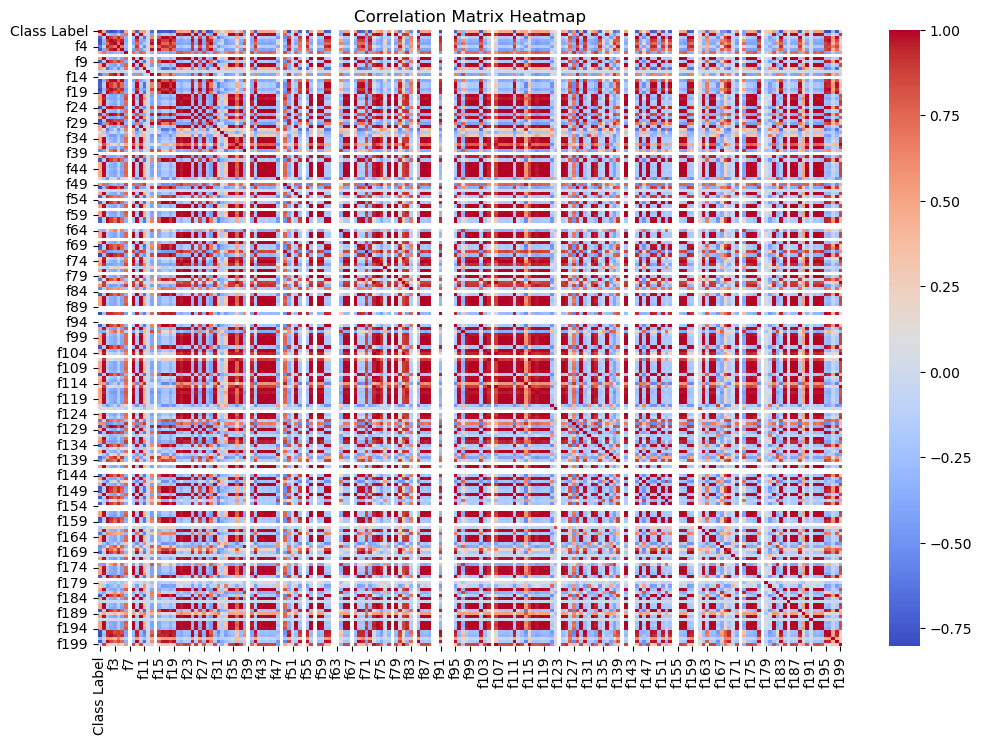

In [9]:
correlation_matrix = ndf.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()

In [10]:
matrix_rank = np.linalg.matrix_rank(ndf.iloc[:, :-1])
print(f"Matrix Rank: {matrix_rank}")


Matrix Rank: 174


In [11]:
scaler = StandardScaler()
normalized_data = scaler.fit_transform(ndf.iloc[:, :-1])
print(f"Data Range After Normalization: Min={normalized_data.min()}, Max={normalized_data.max()}")

Data Range After Normalization: Min=-1.7885459649985487, Max=57.02630971753302



## **2. Classification**

### **Tasks**
1. **Data Splitting**  
   - Split the dataset into training and testing sets with a **75:25 ratio**.
2. **Algorithms**  
   - Use the following classifiers:
     - k-Nearest Neighbors (kNN)
     - Decision Tree
     - Support Vector Machine (SVM)
     - Random Forest
     - Naïve Bayes
3. **Evaluation Metrics**  
   - Evaluate the models using:
     - Accuracy
     - Precision
     - Recall
     - F1-Score
     - AUROC (Area Under the Receiver Operating Characteristic curve)

---


In [13]:
X = normalized_data
y = df['Class Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, classification_report
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import time

In [15]:
classifiers = {
    "kNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(probability=True),
    "Random Forest": RandomForestClassifier(),
    "Naïve Bayes": GaussianNB()
}


In [33]:
results = []

for name, clf in classifiers.items():
    start_time = time.time()
    clf.fit(X_train, y_train)
    train_time = time.time() - start_time

    # Predictions
    y_pred = clf.predict(X_test)
    try:
        y_prob = clf.predict_proba(X_test)[:, 1] if hasattr(clf, "predict_proba") else None
    except:
        y_prob = None  # Skip AUROC calculation if not applicable

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    try:
        auc = roc_auc_score(y_test, y_prob, multi_class='ovr') if y_prob is not None else "N/A"
    except ValueError:
        auc = "N/A"

    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "AUROC": auc,
        "Training Time (s)": train_time
    })

    print(f"Results for {name}:")
    print(classification_report(y_test, y_pred))
    print("\n")


Results for kNN:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       288
           1       0.96      1.00      0.98       376
           2       1.00      0.96      0.98       150

    accuracy                           0.98       814
   macro avg       0.99      0.98      0.98       814
weighted avg       0.98      0.98      0.98       814



Results for Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       288
           1       1.00      1.00      1.00       376
           2       1.00      1.00      1.00       150

    accuracy                           1.00       814
   macro avg       1.00      1.00      1.00       814
weighted avg       1.00      1.00      1.00       814



Results for SVM:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       288
           1       1.00      1.00      1.00       376
          


## **3. Model Performance Analysis**

### **Tasks**
1. **Fit Analysis**  
   - Analyze whether models are **underfitting**, **overfitting**, or **regularly fitting** based on training and testing metrics.
2. **Time Analysis**  
   - Measure training and classification times for each model.

---


In [39]:
import pandas as pd
from tabulate import tabulate  # For pretty-printing tables

# Store results
results = []
fit_analysis = []

# Train and evaluate models
for name, model in classifiers.items():
    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time

    # Measure testing time
    start_time = time.time()
    y_pred_train = model.predict(X_train)  # Predictions on train set
    y_pred_test = model.predict(X_test)  # Predictions on test set
    test_time = time.time() - start_time

    # Evaluate metrics
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)

    # Fit Analysis
    if train_accuracy > test_accuracy + 0.1:  # Significant drop in test performance
        fit_status = "Overfit"
    elif test_accuracy > train_accuracy:  # Poor train performance
        fit_status = "Underfit"
    else:  # Train and test performances are close
        fit_status = "Regular fit"

    # AUROC for test set (if applicable)
    if hasattr(model, "predict_proba"):
        y_prob_test = model.predict_proba(X_test)
        auc_test = roc_auc_score(y_test, y_prob_test, multi_class="ovr")
    else:
        auc_test = "N/A"

    # Append to results
    results.append({
        "Classifier": name,
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "Precision": precision_score(y_test, y_pred_test, average="weighted"),
        "Recall": recall_score(y_test, y_pred_test, average="weighted"),
        "F1-Score": f1_score(y_test, y_pred_test, average="weighted"),
        "AUROC": auc_test,
        "Train Time (s)": train_time,
        "Test Time (s)": test_time,
        "Fit Status": fit_status
    })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print results in a tabular format
print("\nModel Evaluation Results:")
tabulate(results_df, headers='keys', tablefmt='pretty')
results_df


Model Evaluation Results:


,Classifier,Train Accuracy,Test Accuracy,Precision,Recall,F1-Score,AUROC,Train Time (s),Test Time (s),Fit Status
0,kNN,0.99180,0.981572,0.982279,0.981572,0.981590,0.993924,0.007514,0.295259,Regular fit
1,Decision Tree,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,0.107057,0.000000,Regular fit
2,SVM,0.99877,0.997543,0.997551,0.997543,0.997537,1.000000,1.256740,0.392233,Regular fit
3,Random Forest,1.00000,0.987715,0.987839,0.987715,0.987662,0.999605,2.335966,0.110962,Regular fit
4,Naïve Bayes,1.00000,0.998771,0.998775,0.998771,0.998770,0.998508,0.016739,0.048585,Regular fit
